In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import sklearn.metrics as mt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
data=pd.read_csv("global_air_pollution_dataset.csv")
data.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [4]:
data = data.iloc[:,[3,  5,  7,  9, 2,  4,  6,  8,  10, 11]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AQI Category        23463 non-null  object
 1   CO AQI Category     23463 non-null  object
 2   Ozone AQI Category  23463 non-null  object
 3   NO2 AQI Category    23463 non-null  object
 4   AQI Value           23463 non-null  int64 
 5   CO AQI Value        23463 non-null  int64 
 6   Ozone AQI Value     23463 non-null  int64 
 7   NO2 AQI Value       23463 non-null  int64 
 8   PM2.5 AQI Value     23463 non-null  int64 
 9   PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [5]:
data["PM2.5 AQI Category"].value_counts()

PM2.5 AQI Category
Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: count, dtype: int64

In [6]:
#Etiketli verideki sözel olan kategorik değerler sayısal kategorik değerlere dönüştürüldü.
label_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy': 2,
    'Unhealthy for Sensitive Groups': 3,
    'Very Unhealthy':4,
    'Hazardous':5
}


data['PM2.5 AQI Category'] = data['PM2.5 AQI Category'].replace(label_mapping)

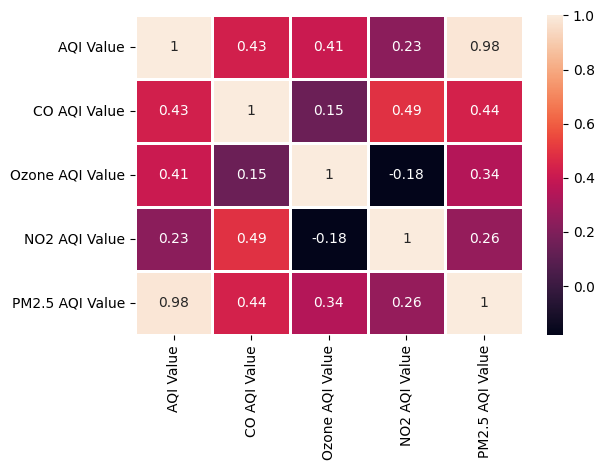

In [7]:
sns.heatmap(data.iloc[:,4:-1].corr(), annot = True, linewidths = 1)
plt.tight_layout()
plt.show()

In [8]:
#Kategoik verileri sayısal kategorik değerlere dönüştürme
def label(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.iloc[:,:4].columns:
    label(i)

data

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,2,0,0,0,51,1,36,0,51,1
1,0,0,0,0,41,1,5,1,41,0
2,2,0,0,0,66,1,39,2,66,1
3,0,0,0,0,34,1,34,0,20,0
4,0,0,0,0,22,0,22,0,6,0
...,...,...,...,...,...,...,...,...,...,...
23458,3,0,2,0,184,3,154,2,184,2
23459,0,0,0,0,50,1,20,5,50,0
23460,0,0,0,0,50,1,22,1,50,0
23461,2,0,0,0,71,1,44,2,71,1


In [9]:
col = list(data.columns)

predictor = col[:-1]

display(predictor)

target = col[-1]
display(target)

['AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

'PM2.5 AQI Category'

In [10]:
X=data.drop(target,axis=1)
Y=data[target]

In [22]:
X=X[["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value"]]

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifierKA = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifierLG = LogisticRegression(random_state = 0)
classifierRF=RandomForestClassifier(n_estimators=100)

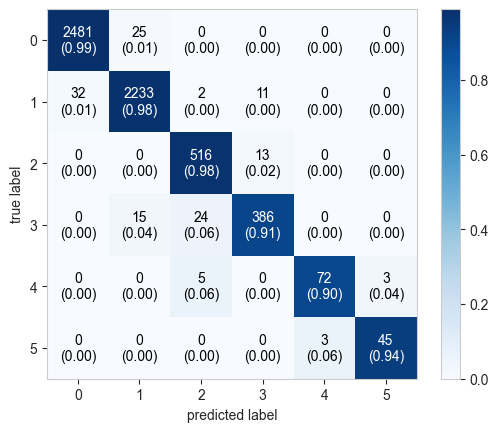

In [24]:
classifierKNN.fit(X_train,y_train)
y_predKNN=classifierKNN.predict(X_test)
# cmKNN = confusion_matrix(y_test, y_predKNN)
# print(cmKNN)
accuracy_scoreKNN=mt.accuracy_score(y_test,y_predKNN)

cmKNN = confusion_matrix(y_test,y_predKNN)
plot_confusion_matrix(conf_mat=cmKNN,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

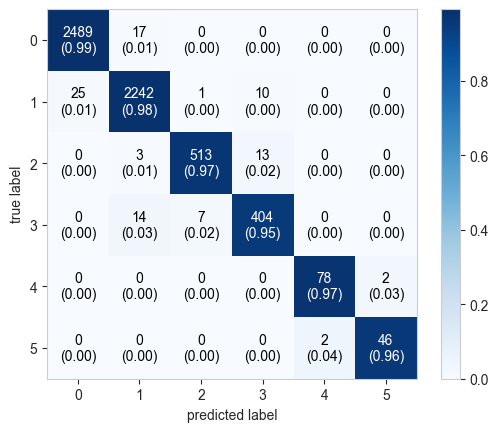

In [25]:
classifierKA.fit(X_train,y_train)
y_predKA=classifierKA.predict(X_test)
accuracy_scoreKA=mt.accuracy_score(y_test,y_predKA)

cmKA = confusion_matrix(y_test,y_predKA)
plot_confusion_matrix(conf_mat=cmKA,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

C:\Users\erolc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


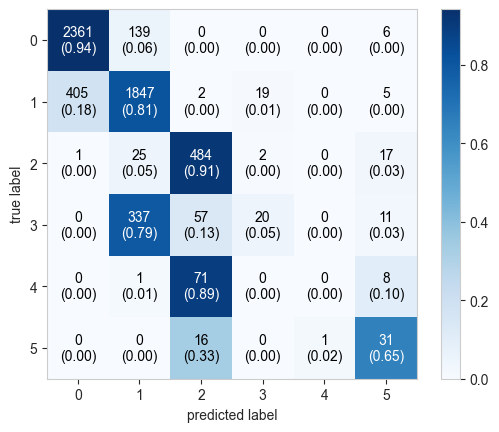

In [26]:
classifierLG.fit(X_train,y_train)
y_predLG=classifierLG.predict(X_test)
accuracy_scoreLG=mt.accuracy_score(y_test,y_predLG)

cmLG = confusion_matrix(y_test,y_predLG)
plot_confusion_matrix(conf_mat=cmLG,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

0.9839754517558813


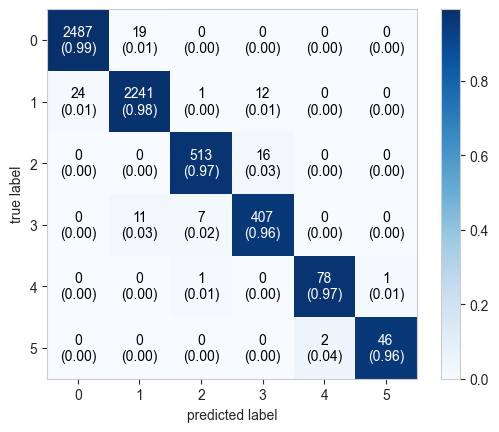

In [27]:
classifierRF.fit(X_train,y_train)
y_predRF=classifierRF.predict(X_test)
accuracy_scoreRF=mt.accuracy_score(y_test,y_predRF)
print(accuracy_scoreRF)

cmRF = confusion_matrix(y_test,y_predRF)
plot_confusion_matrix(conf_mat=cmRF,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [28]:
accuracies = {}
accuracies['K En Yakın Komşu']=accuracy_scoreKNN
accuracies['Karar Ağacı']=accuracy_scoreKA
accuracies['Lojistik Regresyon']=accuracy_scoreLG
accuracies['Rasgele Orman']=accuracy_scoreRF

C:\Users\erolc\AppData\Local\Temp\ipykernel_26200\1604339365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


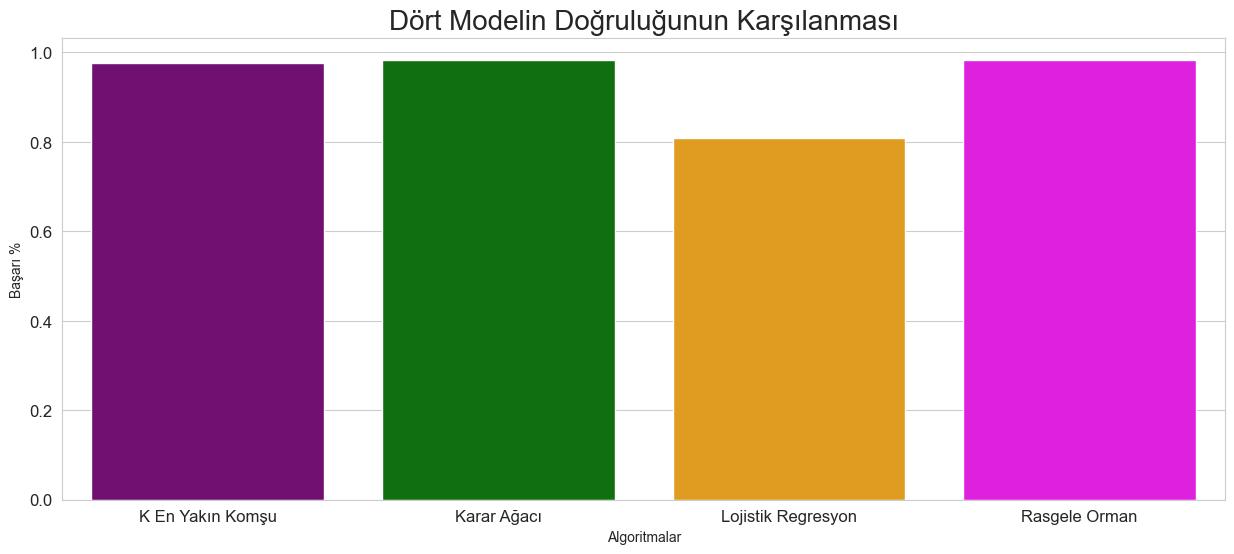

In [29]:
import seaborn as sns
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Dört Modelin Doğruluğunun Karşılanması', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")


plt.show()

In [30]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
1,Karar Ağacı,0.983975
3,Rasgele Orman,0.983975
0,K En Yakın Komşu,0.977327
2,Lojistik Regresyon,0.808558


In [32]:
import pickle
filename='KAModel.sav'
pickle.dump(classifierKA,open(filename,'wb'))